In [4]:
# import the necessary packages
import numpy as np
import argparse
import cv2
# construct the argument parser and parse the arguments
import matplotlib.pyplot as plt


In [101]:
def load_image(image_name):
    path = './images/'
    image = cv2.imread(path+image_name)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    pixels = image.shape[1]*image.shape[0]
    pixel_limit = 538450
    resized_image = image
    if pixels>pixel_limit:
        scale_percent = round(pixel_limit/pixels,2)*100
        # percent of original size
        width = int(image.shape[1] * scale_percent / 100)
        height = int(image.shape[0] * scale_percent / 100)
        dim = (width, height)
        # resize image
        resized_image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    original_image = image
    return original_image, resized_image

x: 74
y: 231
area:438.5
x: 75
y: 103
area:400.0


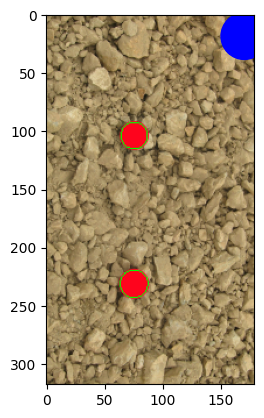

In [112]:
import numpy as np
import cv2
import pandas as pd

balls_data = {'x':[], 'y':[], 'area':[]}

image = load_image('12.JPG')[1]
original = image.copy()

lower = np.array([240, 0, 0], dtype="uint8")
upper = np.array([255, 30, 30], dtype="uint8")
mask = cv2.inRange(image, lower, upper)
detected = cv2.bitwise_and(original, original, mask=mask)

# Remove noise
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=1)

# Find contours and find total area
cnts = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
area = 0
for c in cnts:
    area += cv2.contourArea(c)
    cv2.drawContours(original,[c], 0, (0,0,0), 2)


gray = opening
  
# setting threshold of gray image
_, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
  
# using a findContours() function
contours, _ = cv2.findContours(
    threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

  
# list for storing names of shapes
for contour in contours:

    approx = cv2.approxPolyDP(
        contour, 0.01 * cv2.arcLength(contour, True), True)
    area = cv2.contourArea(contour)
    # using drawContours() function
    cv2.drawContours(image, [contour], 0, (0, 255, 0), 1)
  
    # finding center point of shape
    M = cv2.moments(contour)
    if M['m00'] != 0.0:
        
        x = int(M['m10']/M['m00'])
        y = int(M['m01']/M['m00'])
    # cv2.putText(opening, 'circle', (x, y),
    #             cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

    balls_data['x'].append(x)
    balls_data['y'].append(y)
    balls_data['area'].append(area)

    print('x: '+str(x))
    print('y: '+str(y))
    print('area:' + str(area))
  
# displaying the image after drawing contours
cv2.imshow('shapes', image)
  
cv2.waitKey(0)
cv2.destroyAllWindows()

pd.DataFrame(balls_data)



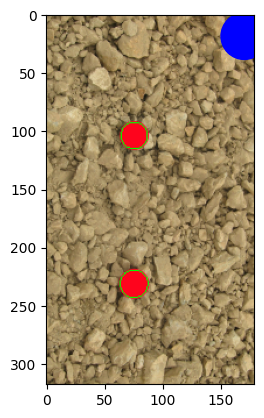

In [110]:
fig,ax = plt.subplots(1)
ax.set_aspect('equal')

# Show the image
ax.imshow(image)
circle1 = plt.Circle((170, 18), 20, color='b')
plt.gca().add_patch(circle1)